In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = '../data'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32


train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=DATA_DIR,
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed=42,
    validation_split=0.2,
    subset='training'
    )

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=DATA_DIR,
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed=42,
    validation_split=0.2,
    subset='validation'
    )

classes = train_ds.class_names

print(f'Classes: {classes}')
print(f'Number of classes: {len(classes)}')
print(f'Number of training batches: {len(train_ds)}')
print(f'Number of validation batches: {len(val_ds)}')

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
Classes: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
Number of classes: 10
Number of training batches: 655
Number of validation batches: 164


In [3]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(0.2),
])

In [4]:
base_model_mobilenet = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False, 
    weights='imagenet'
)
base_model_mobilenet.trainable = False

In [ ]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    
    # augmentation
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    
    tf.keras.layers.Rescaling(1./127.5, offset=-1),
    
    # base model is a layer
    base_model_mobilenet,
    
    # add custom final layer
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

In [ ]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
history = cnn_model.fit(
    train_ds,
    epochs=10, 
    validation_data=val_ds
)

Epoch 1/10
 33/655 ━━━━━━━━━━━━━━━━━━━━ 4:01 388ms/step - accuracy: 0.2888 - loss: 2.0606

2025-12-15 03:45:42.105569: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


106/655 ━━━━━━━━━━━━━━━━━━━━ 3:37 395ms/step - accuracy: 0.5260 - loss: 1.4318

2025-12-15 03:46:11.206193: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


133/655 ━━━━━━━━━━━━━━━━━━━━ 3:37 416ms/step - accuracy: 0.5703 - loss: 1.3106

2025-12-15 03:46:24.630379: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


141/655 ━━━━━━━━━━━━━━━━━━━━ 3:34 418ms/step - accuracy: 0.5813 - loss: 1.2801

2025-12-15 03:46:28.215384: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


251/655 ━━━━━━━━━━━━━━━━━━━━ 2:52 427ms/step - accuracy: 0.6767 - loss: 1.0065

2025-12-15 03:47:16.316341: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


264/655 ━━━━━━━━━━━━━━━━━━━━ 2:47 427ms/step - accuracy: 0.6841 - loss: 0.9849

2025-12-15 03:47:22.057381: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


274/655 ━━━━━━━━━━━━━━━━━━━━ 2:43 429ms/step - accuracy: 0.6894 - loss: 0.9693

2025-12-15 03:47:26.769988: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


292/655 ━━━━━━━━━━━━━━━━━━━━ 2:35 429ms/step - accuracy: 0.6983 - loss: 0.9429

2025-12-15 03:47:34.472810: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


298/655 ━━━━━━━━━━━━━━━━━━━━ 2:32 429ms/step - accuracy: 0.7011 - loss: 0.9346

2025-12-15 03:47:36.949708: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


301/655 ━━━━━━━━━━━━━━━━━━━━ 2:31 429ms/step - accuracy: 0.7024 - loss: 0.9306

2025-12-15 03:47:38.237144: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


355/655 ━━━━━━━━━━━━━━━━━━━━ 2:09 430ms/step - accuracy: 0.7238 - loss: 0.8664

2025-12-15 03:48:01.918299: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


415/655 ━━━━━━━━━━━━━━━━━━━━ 1:43 431ms/step - accuracy: 0.7424 - loss: 0.8105

2025-12-15 03:48:28.226081: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


433/655 ━━━━━━━━━━━━━━━━━━━━ 1:35 432ms/step - accuracy: 0.7472 - loss: 0.7960

2025-12-15 03:48:36.237936: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


473/655 ━━━━━━━━━━━━━━━━━━━━ 1:18 430ms/step - accuracy: 0.7569 - loss: 0.7665

2025-12-15 03:48:52.753182: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


614/655 ━━━━━━━━━━━━━━━━━━━━ 17s 420ms/step - accuracy: 0.7833 - loss: 0.6864

2025-12-15 03:49:47.113719: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


639/655 ━━━━━━━━━━━━━━━━━━━━ 6s 420ms/step - accuracy: 0.7869 - loss: 0.6751

2025-12-15 03:49:57.510504: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


642/655 ━━━━━━━━━━━━━━━━━━━━ 5s 420ms/step - accuracy: 0.7874 - loss: 0.6738

2025-12-15 03:49:58.657535: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.7892 - loss: 0.6683

2025-12-15 03:50:25.081946: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 03:50:25.453163: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 03:50:25.815668: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 03:50:39.386232: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 03:50:55.896253: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 334s 507ms/step - accuracy: 0.8784 - loss: 0.3954 - val_accuracy: 0.9599 - val_loss: 0.1422
Epoch 2/10
 46/655 ━━━━━━━━━━━━━━━━━━━━ 3:51 381ms/step - accuracy: 0.9283 - loss: 0.2384

2025-12-15 03:51:18.670256: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


112/655 ━━━━━━━━━━━━━━━━━━━━ 3:32 391ms/step - accuracy: 0.9267 - loss: 0.2464

2025-12-15 03:51:44.900189: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


124/655 ━━━━━━━━━━━━━━━━━━━━ 3:27 390ms/step - accuracy: 0.9265 - loss: 0.2464

2025-12-15 03:51:49.547358: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


141/655 ━━━━━━━━━━━━━━━━━━━━ 3:19 389ms/step - accuracy: 0.9263 - loss: 0.2460

2025-12-15 03:51:56.003327: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


253/655 ━━━━━━━━━━━━━━━━━━━━ 2:35 387ms/step - accuracy: 0.9257 - loss: 0.2440

2025-12-15 03:52:39.171847: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


263/655 ━━━━━━━━━━━━━━━━━━━━ 2:31 388ms/step - accuracy: 0.9257 - loss: 0.2439

2025-12-15 03:52:43.079801: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 03:52:43.080321: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


270/655 ━━━━━━━━━━━━━━━━━━━━ 2:29 388ms/step - accuracy: 0.9257 - loss: 0.2438

2025-12-15 03:52:45.826503: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


288/655 ━━━━━━━━━━━━━━━━━━━━ 2:22 388ms/step - accuracy: 0.9257 - loss: 0.2435

2025-12-15 03:52:52.884912: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


305/655 ━━━━━━━━━━━━━━━━━━━━ 2:15 388ms/step - accuracy: 0.9257 - loss: 0.2432

2025-12-15 03:52:59.471581: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


352/655 ━━━━━━━━━━━━━━━━━━━━ 1:57 388ms/step - accuracy: 0.9255 - loss: 0.2427

2025-12-15 03:53:17.774773: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


401/655 ━━━━━━━━━━━━━━━━━━━━ 1:38 387ms/step - accuracy: 0.9253 - loss: 0.2426

2025-12-15 03:53:36.437313: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


431/655 ━━━━━━━━━━━━━━━━━━━━ 1:26 387ms/step - accuracy: 0.9252 - loss: 0.2423

2025-12-15 03:53:47.989580: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


482/655 ━━━━━━━━━━━━━━━━━━━━ 1:06 387ms/step - accuracy: 0.9252 - loss: 0.2416

2025-12-15 03:54:07.524083: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


622/655 ━━━━━━━━━━━━━━━━━━━━ 12s 388ms/step - accuracy: 0.9253 - loss: 0.2407

2025-12-15 03:55:02.781424: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 03:55:02.793278: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


640/655 ━━━━━━━━━━━━━━━━━━━━ 5s 389ms/step - accuracy: 0.9253 - loss: 0.2407

2025-12-15 03:55:09.851529: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.9253 - loss: 0.2407

2025-12-15 03:55:32.495644: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 03:55:35.672144: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 03:55:38.992570: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 03:55:55.770968: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 03:56:09.876567: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 312s 476ms/step - accuracy: 0.9245 - loss: 0.2441 - val_accuracy: 0.9612 - val_loss: 0.1314
Epoch 3/10
 25/655 ━━━━━━━━━━━━━━━━━━━━ 4:05 390ms/step - accuracy: 0.9492 - loss: 0.1767

2025-12-15 03:56:22.525701: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


102/655 ━━━━━━━━━━━━━━━━━━━━ 3:33 386ms/step - accuracy: 0.9347 - loss: 0.2139

2025-12-15 03:56:52.136905: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


115/655 ━━━━━━━━━━━━━━━━━━━━ 3:28 387ms/step - accuracy: 0.9343 - loss: 0.2149

2025-12-15 03:56:57.227001: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


145/655 ━━━━━━━━━━━━━━━━━━━━ 3:16 385ms/step - accuracy: 0.9333 - loss: 0.2176

2025-12-15 03:57:08.582606: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


255/655 ━━━━━━━━━━━━━━━━━━━━ 2:33 383ms/step - accuracy: 0.9318 - loss: 0.2217

2025-12-15 03:57:50.412178: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


258/655 ━━━━━━━━━━━━━━━━━━━━ 2:32 383ms/step - accuracy: 0.9318 - loss: 0.2217

2025-12-15 03:57:51.592024: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


262/655 ━━━━━━━━━━━━━━━━━━━━ 2:30 383ms/step - accuracy: 0.9318 - loss: 0.2216

2025-12-15 03:57:53.152738: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


265/655 ━━━━━━━━━━━━━━━━━━━━ 2:29 383ms/step - accuracy: 0.9318 - loss: 0.2216

2025-12-15 03:57:54.386832: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


287/655 ━━━━━━━━━━━━━━━━━━━━ 2:21 384ms/step - accuracy: 0.9318 - loss: 0.2216

2025-12-15 03:58:02.852467: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


289/655 ━━━━━━━━━━━━━━━━━━━━ 2:20 384ms/step - accuracy: 0.9318 - loss: 0.2215

2025-12-15 03:58:03.645626: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


361/655 ━━━━━━━━━━━━━━━━━━━━ 1:52 384ms/step - accuracy: 0.9318 - loss: 0.2213

2025-12-15 03:58:31.461487: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


381/655 ━━━━━━━━━━━━━━━━━━━━ 1:45 384ms/step - accuracy: 0.9317 - loss: 0.2213

2025-12-15 03:58:39.264494: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


421/655 ━━━━━━━━━━━━━━━━━━━━ 1:30 385ms/step - accuracy: 0.9317 - loss: 0.2213

2025-12-15 03:58:54.765003: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


466/655 ━━━━━━━━━━━━━━━━━━━━ 1:12 384ms/step - accuracy: 0.9317 - loss: 0.2209

2025-12-15 03:59:11.948668: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


606/655 ━━━━━━━━━━━━━━━━━━━━ 19s 388ms/step - accuracy: 0.9319 - loss: 0.2197

2025-12-15 04:00:08.010990: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:00:08.017480: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


638/655 ━━━━━━━━━━━━━━━━━━━━ 6s 389ms/step - accuracy: 0.9319 - loss: 0.2196

2025-12-15 04:00:20.669458: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.9319 - loss: 0.2196

2025-12-15 04:00:47.250277: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:00:49.354279: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:00:49.722200: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:01:02.208926: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:01:17.885871: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 311s 475ms/step - accuracy: 0.9317 - loss: 0.2193 - val_accuracy: 0.9620 - val_loss: 0.1325
Epoch 4/10
 29/655 ━━━━━━━━━━━━━━━━━━━━ 3:56 378ms/step - accuracy: 0.9406 - loss: 0.1988

2025-12-15 04:01:34.754979: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


110/655 ━━━━━━━━━━━━━━━━━━━━ 3:27 381ms/step - accuracy: 0.9403 - loss: 0.2038

2025-12-15 04:02:05.703169: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


120/655 ━━━━━━━━━━━━━━━━━━━━ 3:24 382ms/step - accuracy: 0.9401 - loss: 0.2042

2025-12-15 04:02:09.583806: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


143/655 ━━━━━━━━━━━━━━━━━━━━ 3:15 382ms/step - accuracy: 0.9398 - loss: 0.2049

2025-12-15 04:02:18.425271: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


255/655 ━━━━━━━━━━━━━━━━━━━━ 2:32 382ms/step - accuracy: 0.9383 - loss: 0.2080

2025-12-15 04:03:01.213411: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


265/655 ━━━━━━━━━━━━━━━━━━━━ 2:29 382ms/step - accuracy: 0.9382 - loss: 0.2081

2025-12-15 04:03:05.030553: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


271/655 ━━━━━━━━━━━━━━━━━━━━ 2:26 382ms/step - accuracy: 0.9381 - loss: 0.2082

2025-12-15 04:03:07.355747: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


274/655 ━━━━━━━━━━━━━━━━━━━━ 2:25 382ms/step - accuracy: 0.9381 - loss: 0.2082

2025-12-15 04:03:08.481831: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


285/655 ━━━━━━━━━━━━━━━━━━━━ 2:21 382ms/step - accuracy: 0.9380 - loss: 0.2082

2025-12-15 04:03:12.743890: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


305/655 ━━━━━━━━━━━━━━━━━━━━ 2:13 382ms/step - accuracy: 0.9380 - loss: 0.2080

2025-12-15 04:03:20.375889: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


351/655 ━━━━━━━━━━━━━━━━━━━━ 1:55 380ms/step - accuracy: 0.9377 - loss: 0.2074

2025-12-15 04:03:37.201205: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


382/655 ━━━━━━━━━━━━━━━━━━━━ 1:43 380ms/step - accuracy: 0.9377 - loss: 0.2073

2025-12-15 04:03:48.759575: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


437/655 ━━━━━━━━━━━━━━━━━━━━ 1:23 381ms/step - accuracy: 0.9375 - loss: 0.2073

2025-12-15 04:04:10.394631: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


487/655 ━━━━━━━━━━━━━━━━━━━━ 1:04 382ms/step - accuracy: 0.9374 - loss: 0.2072

2025-12-15 04:04:29.646188: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


621/655 ━━━━━━━━━━━━━━━━━━━━ 13s 383ms/step - accuracy: 0.9374 - loss: 0.2070

2025-12-15 04:05:21.879586: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


626/655 ━━━━━━━━━━━━━━━━━━━━ 11s 383ms/step - accuracy: 0.9373 - loss: 0.2070

2025-12-15 04:05:23.837591: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


643/655 ━━━━━━━━━━━━━━━━━━━━ 4s 384ms/step - accuracy: 0.9373 - loss: 0.2071

2025-12-15 04:05:30.463174: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.9373 - loss: 0.2071

2025-12-15 04:05:56.813633: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:05:57.213529: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:05:58.333809: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:06:19.561997: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:06:39.530976: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 317s 484ms/step - accuracy: 0.9357 - loss: 0.2110 - val_accuracy: 0.9664 - val_loss: 0.1240
Epoch 5/10
 57/655 ━━━━━━━━━━━━━━━━━━━━ 4:07 414ms/step - accuracy: 0.9312 - loss: 0.1986

2025-12-15 04:07:04.459111: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


113/655 ━━━━━━━━━━━━━━━━━━━━ 3:59 443ms/step - accuracy: 0.9331 - loss: 0.2026

2025-12-15 04:07:30.837327: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


121/655 ━━━━━━━━━━━━━━━━━━━━ 3:54 439ms/step - accuracy: 0.9332 - loss: 0.2027

2025-12-15 04:07:33.944193: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


140/655 ━━━━━━━━━━━━━━━━━━━━ 3:43 433ms/step - accuracy: 0.9334 - loss: 0.2037

2025-12-15 04:07:41.478804: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


258/655 ━━━━━━━━━━━━━━━━━━━━ 2:49 426ms/step - accuracy: 0.9345 - loss: 0.2046

2025-12-15 04:08:30.717370: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


263/655 ━━━━━━━━━━━━━━━━━━━━ 2:46 425ms/step - accuracy: 0.9346 - loss: 0.2045

2025-12-15 04:08:32.661193: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


270/655 ━━━━━━━━━━━━━━━━━━━━ 2:43 425ms/step - accuracy: 0.9346 - loss: 0.2044

2025-12-15 04:08:35.529862: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


276/655 ━━━━━━━━━━━━━━━━━━━━ 2:41 425ms/step - accuracy: 0.9346 - loss: 0.2044

2025-12-15 04:08:38.167181: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


279/655 ━━━━━━━━━━━━━━━━━━━━ 2:40 426ms/step - accuracy: 0.9347 - loss: 0.2043

2025-12-15 04:08:39.678199: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


301/655 ━━━━━━━━━━━━━━━━━━━━ 2:30 424ms/step - accuracy: 0.9348 - loss: 0.2040

2025-12-15 04:08:48.581665: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


363/655 ━━━━━━━━━━━━━━━━━━━━ 2:02 419ms/step - accuracy: 0.9352 - loss: 0.2030

2025-12-15 04:09:12.793837: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


382/655 ━━━━━━━━━━━━━━━━━━━━ 1:54 419ms/step - accuracy: 0.9352 - loss: 0.2031

2025-12-15 04:09:20.881592: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


431/655 ━━━━━━━━━━━━━━━━━━━━ 1:33 416ms/step - accuracy: 0.9353 - loss: 0.2031

2025-12-15 04:09:40.179594: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


472/655 ━━━━━━━━━━━━━━━━━━━━ 1:15 415ms/step - accuracy: 0.9353 - loss: 0.2028

2025-12-15 04:09:56.641617: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


614/655 ━━━━━━━━━━━━━━━━━━━━ 16s 410ms/step - accuracy: 0.9355 - loss: 0.2021

2025-12-15 04:10:52.599610: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


615/655 ━━━━━━━━━━━━━━━━━━━━ 16s 410ms/step - accuracy: 0.9355 - loss: 0.2021

2025-12-15 04:10:53.020782: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


641/655 ━━━━━━━━━━━━━━━━━━━━ 5s 409ms/step - accuracy: 0.9355 - loss: 0.2021

2025-12-15 04:11:03.112366: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.9355 - loss: 0.2021

2025-12-15 04:11:23.375448: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:11:27.337019: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:11:28.751724: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:11:45.063393: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:12:01.376976: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 326s 498ms/step - accuracy: 0.9354 - loss: 0.2035 - val_accuracy: 0.9652 - val_loss: 0.1153
Epoch 6/10
 47/655 ━━━━━━━━━━━━━━━━━━━━ 3:54 385ms/step - accuracy: 0.9377 - loss: 0.2024

2025-12-15 04:12:24.949088: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


121/655 ━━━━━━━━━━━━━━━━━━━━ 3:33 401ms/step - accuracy: 0.9369 - loss: 0.2070

2025-12-15 04:12:55.317039: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


122/655 ━━━━━━━━━━━━━━━━━━━━ 3:33 401ms/step - accuracy: 0.9369 - loss: 0.2069

2025-12-15 04:12:55.712219: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


141/655 ━━━━━━━━━━━━━━━━━━━━ 3:25 399ms/step - accuracy: 0.9368 - loss: 0.2066

2025-12-15 04:13:03.089783: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


253/655 ━━━━━━━━━━━━━━━━━━━━ 2:39 397ms/step - accuracy: 0.9366 - loss: 0.2055

2025-12-15 04:13:47.375828: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 2:34 398ms/step - accuracy: 0.9366 - loss: 0.2052

2025-12-15 04:13:52.698729: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:13:52.707370: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


281/655 ━━━━━━━━━━━━━━━━━━━━ 2:29 400ms/step - accuracy: 0.9366 - loss: 0.2049

2025-12-15 04:13:59.275578: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


284/655 ━━━━━━━━━━━━━━━━━━━━ 2:28 400ms/step - accuracy: 0.9366 - loss: 0.2048

2025-12-15 04:14:00.485328: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


305/655 ━━━━━━━━━━━━━━━━━━━━ 2:19 399ms/step - accuracy: 0.9365 - loss: 0.2043

2025-12-15 04:14:08.612405: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


381/655 ━━━━━━━━━━━━━━━━━━━━ 1:49 400ms/step - accuracy: 0.9363 - loss: 0.2036

2025-12-15 04:14:39.224256: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


390/655 ━━━━━━━━━━━━━━━━━━━━ 1:45 400ms/step - accuracy: 0.9363 - loss: 0.2035

2025-12-15 04:14:42.815543: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


429/655 ━━━━━━━━━━━━━━━━━━━━ 1:30 402ms/step - accuracy: 0.9362 - loss: 0.2034

2025-12-15 04:14:59.478181: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


473/655 ━━━━━━━━━━━━━━━━━━━━ 1:13 402ms/step - accuracy: 0.9362 - loss: 0.2031

2025-12-15 04:15:16.903260: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


621/655 ━━━━━━━━━━━━━━━━━━━━ 13s 399ms/step - accuracy: 0.9365 - loss: 0.2017

2025-12-15 04:16:14.324776: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


624/655 ━━━━━━━━━━━━━━━━━━━━ 12s 399ms/step - accuracy: 0.9365 - loss: 0.2017

2025-12-15 04:16:15.541765: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


644/655 ━━━━━━━━━━━━━━━━━━━━ 4s 398ms/step - accuracy: 0.9365 - loss: 0.2017

2025-12-15 04:16:23.460725: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.9365 - loss: 0.2017

2025-12-15 04:16:45.927717: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:16:47.032103: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:16:49.177945: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:17:14.638167: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:17:20.616793: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 319s 487ms/step - accuracy: 0.9371 - loss: 0.2012 - val_accuracy: 0.9628 - val_loss: 0.1261
Epoch 7/10
 17/655 ━━━━━━━━━━━━━━━━━━━━ 4:03 382ms/step - accuracy: 0.9475 - loss: 0.1603

2025-12-15 04:17:32.388402: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


 94/655 ━━━━━━━━━━━━━━━━━━━━ 3:35 384ms/step - accuracy: 0.9356 - loss: 0.2004

2025-12-15 04:18:02.019370: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


109/655 ━━━━━━━━━━━━━━━━━━━━ 3:29 384ms/step - accuracy: 0.9356 - loss: 0.2005

2025-12-15 04:18:07.770119: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


129/655 ━━━━━━━━━━━━━━━━━━━━ 3:22 385ms/step - accuracy: 0.9354 - loss: 0.2005

2025-12-15 04:18:15.501267: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


245/655 ━━━━━━━━━━━━━━━━━━━━ 2:38 386ms/step - accuracy: 0.9357 - loss: 0.2022

2025-12-15 04:19:00.364015: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


256/655 ━━━━━━━━━━━━━━━━━━━━ 2:33 386ms/step - accuracy: 0.9358 - loss: 0.2021

2025-12-15 04:19:04.597267: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


258/655 ━━━━━━━━━━━━━━━━━━━━ 2:33 386ms/step - accuracy: 0.9358 - loss: 0.2020

2025-12-15 04:19:05.398037: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


265/655 ━━━━━━━━━━━━━━━━━━━━ 2:30 386ms/step - accuracy: 0.9359 - loss: 0.2020

2025-12-15 04:19:08.096446: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


268/655 ━━━━━━━━━━━━━━━━━━━━ 2:29 386ms/step - accuracy: 0.9359 - loss: 0.2019

2025-12-15 04:19:09.253120: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


286/655 ━━━━━━━━━━━━━━━━━━━━ 2:22 387ms/step - accuracy: 0.9361 - loss: 0.2018

2025-12-15 04:19:16.709446: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


342/655 ━━━━━━━━━━━━━━━━━━━━ 2:03 395ms/step - accuracy: 0.9365 - loss: 0.2008

2025-12-15 04:19:41.031860: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


372/655 ━━━━━━━━━━━━━━━━━━━━ 1:53 403ms/step - accuracy: 0.9367 - loss: 0.2003

2025-12-15 04:19:55.698928: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


428/655 ━━━━━━━━━━━━━━━━━━━━ 1:31 405ms/step - accuracy: 0.9370 - loss: 0.1995

2025-12-15 04:20:19.238682: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


460/655 ━━━━━━━━━━━━━━━━━━━━ 1:18 404ms/step - accuracy: 0.9372 - loss: 0.1990

2025-12-15 04:20:31.589325: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


603/655 ━━━━━━━━━━━━━━━━━━━━ 20s 401ms/step - accuracy: 0.9377 - loss: 0.1974

2025-12-15 04:21:27.401564: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


606/655 ━━━━━━━━━━━━━━━━━━━━ 19s 401ms/step - accuracy: 0.9377 - loss: 0.1974

2025-12-15 04:21:28.649146: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


635/655 ━━━━━━━━━━━━━━━━━━━━ 8s 401ms/step - accuracy: 0.9378 - loss: 0.1973

2025-12-15 04:21:40.494793: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.9378 - loss: 0.1972

2025-12-15 04:22:02.708842: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:22:06.183483: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:22:18.587829: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:22:28.258482: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:22:41.363336: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 319s 487ms/step - accuracy: 0.9375 - loss: 0.1977 - val_accuracy: 0.9650 - val_loss: 0.1245
Epoch 8/10
 34/655 ━━━━━━━━━━━━━━━━━━━━ 3:57 383ms/step - accuracy: 0.9443 - loss: 0.1854

2025-12-15 04:22:58.157894: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


108/655 ━━━━━━━━━━━━━━━━━━━━ 3:28 382ms/step - accuracy: 0.9393 - loss: 0.2065

2025-12-15 04:23:26.370954: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


120/655 ━━━━━━━━━━━━━━━━━━━━ 3:24 383ms/step - accuracy: 0.9390 - loss: 0.2068

2025-12-15 04:23:31.105371: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


148/655 ━━━━━━━━━━━━━━━━━━━━ 3:17 390ms/step - accuracy: 0.9386 - loss: 0.2078

2025-12-15 04:23:42.835116: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


256/655 ━━━━━━━━━━━━━━━━━━━━ 2:34 388ms/step - accuracy: 0.9371 - loss: 0.2090

2025-12-15 04:24:24.555897: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


266/655 ━━━━━━━━━━━━━━━━━━━━ 2:31 388ms/step - accuracy: 0.9371 - loss: 0.2087

2025-12-15 04:24:28.450024: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


269/655 ━━━━━━━━━━━━━━━━━━━━ 2:29 388ms/step - accuracy: 0.9371 - loss: 0.2087

2025-12-15 04:24:29.616201: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


279/655 ━━━━━━━━━━━━━━━━━━━━ 2:26 389ms/step - accuracy: 0.9370 - loss: 0.2085

2025-12-15 04:24:33.801154: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


282/655 ━━━━━━━━━━━━━━━━━━━━ 2:25 390ms/step - accuracy: 0.9370 - loss: 0.2084

2025-12-15 04:24:35.016527: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


299/655 ━━━━━━━━━━━━━━━━━━━━ 2:18 390ms/step - accuracy: 0.9370 - loss: 0.2081

2025-12-15 04:24:41.675032: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


376/655 ━━━━━━━━━━━━━━━━━━━━ 1:48 389ms/step - accuracy: 0.9369 - loss: 0.2066

2025-12-15 04:25:11.557684: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


396/655 ━━━━━━━━━━━━━━━━━━━━ 1:40 390ms/step - accuracy: 0.9369 - loss: 0.2062

2025-12-15 04:25:19.493517: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


441/655 ━━━━━━━━━━━━━━━━━━━━ 1:23 389ms/step - accuracy: 0.9370 - loss: 0.2054

2025-12-15 04:25:36.871397: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


474/655 ━━━━━━━━━━━━━━━━━━━━ 1:10 390ms/step - accuracy: 0.9371 - loss: 0.2048

2025-12-15 04:25:49.841320: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


617/655 ━━━━━━━━━━━━━━━━━━━━ 14s 390ms/step - accuracy: 0.9375 - loss: 0.2025

2025-12-15 04:26:45.876947: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


622/655 ━━━━━━━━━━━━━━━━━━━━ 12s 390ms/step - accuracy: 0.9375 - loss: 0.2025

2025-12-15 04:26:47.886117: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


640/655 ━━━━━━━━━━━━━━━━━━━━ 5s 390ms/step - accuracy: 0.9376 - loss: 0.2023

2025-12-15 04:26:54.776065: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.9376 - loss: 0.2022

2025-12-15 04:27:16.955835: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:27:20.881154: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:27:21.592929: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:27:36.954243: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:27:50.877687: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 313s 478ms/step - accuracy: 0.9380 - loss: 0.1991 - val_accuracy: 0.9673 - val_loss: 0.1249
Epoch 9/10
 29/655 ━━━━━━━━━━━━━━━━━━━━ 3:57 380ms/step - accuracy: 0.9453 - loss: 0.1740

2025-12-15 04:28:09.067313: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


114/655 ━━━━━━━━━━━━━━━━━━━━ 3:28 385ms/step - accuracy: 0.9406 - loss: 0.1891

2025-12-15 04:28:41.986610: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


143/655 ━━━━━━━━━━━━━━━━━━━━ 3:17 386ms/step - accuracy: 0.9400 - loss: 0.1920

2025-12-15 04:28:53.224360: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


150/655 ━━━━━━━━━━━━━━━━━━━━ 3:15 387ms/step - accuracy: 0.9399 - loss: 0.1924

2025-12-15 04:28:56.046301: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


251/655 ━━━━━━━━━━━━━━━━━━━━ 2:36 387ms/step - accuracy: 0.9391 - loss: 0.1953

2025-12-15 04:29:35.238363: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


265/655 ━━━━━━━━━━━━━━━━━━━━ 2:31 387ms/step - accuracy: 0.9390 - loss: 0.1953

2025-12-15 04:29:40.667152: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


267/655 ━━━━━━━━━━━━━━━━━━━━ 2:30 387ms/step - accuracy: 0.9390 - loss: 0.1953

2025-12-15 04:29:41.474198: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


273/655 ━━━━━━━━━━━━━━━━━━━━ 2:27 387ms/step - accuracy: 0.9390 - loss: 0.1953

2025-12-15 04:29:43.814170: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


282/655 ━━━━━━━━━━━━━━━━━━━━ 2:24 388ms/step - accuracy: 0.9390 - loss: 0.1953

2025-12-15 04:29:47.340912: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


301/655 ━━━━━━━━━━━━━━━━━━━━ 2:17 390ms/step - accuracy: 0.9389 - loss: 0.1953

2025-12-15 04:29:55.290385: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


356/655 ━━━━━━━━━━━━━━━━━━━━ 1:56 390ms/step - accuracy: 0.9389 - loss: 0.1952

2025-12-15 04:30:16.947909: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


385/655 ━━━━━━━━━━━━━━━━━━━━ 1:45 390ms/step - accuracy: 0.9388 - loss: 0.1954

2025-12-15 04:30:28.349579: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


429/655 ━━━━━━━━━━━━━━━━━━━━ 1:28 392ms/step - accuracy: 0.9387 - loss: 0.1956

2025-12-15 04:30:46.021140: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


487/655 ━━━━━━━━━━━━━━━━━━━━ 1:05 391ms/step - accuracy: 0.9387 - loss: 0.1957

2025-12-15 04:31:08.334617: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


619/655 ━━━━━━━━━━━━━━━━━━━━ 14s 391ms/step - accuracy: 0.9386 - loss: 0.1959

2025-12-15 04:32:00.025937: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


631/655 ━━━━━━━━━━━━━━━━━━━━ 9s 391ms/step - accuracy: 0.9385 - loss: 0.1959

2025-12-15 04:32:04.842087: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


649/655 ━━━━━━━━━━━━━━━━━━━━ 2s 391ms/step - accuracy: 0.9385 - loss: 0.1960

2025-12-15 04:32:11.923895: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.9385 - loss: 0.1961

2025-12-15 04:32:31.088606: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:32:31.824669: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:32:41.231191: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:32:51.027250: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:33:06.304581: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 314s 480ms/step - accuracy: 0.9373 - loss: 0.2014 - val_accuracy: 0.9662 - val_loss: 0.1242
Epoch 10/10
 39/655 ━━━━━━━━━━━━━━━━━━━━ 3:59 390ms/step - accuracy: 0.9523 - loss: 0.1638

2025-12-15 04:33:27.461896: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


110/655 ━━━━━━━━━━━━━━━━━━━━ 3:32 391ms/step - accuracy: 0.9484 - loss: 0.1791

2025-12-15 04:33:55.228302: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


125/655 ━━━━━━━━━━━━━━━━━━━━ 3:27 391ms/step - accuracy: 0.9477 - loss: 0.1806

2025-12-15 04:34:01.141213: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


149/655 ━━━━━━━━━━━━━━━━━━━━ 3:17 391ms/step - accuracy: 0.9465 - loss: 0.1829

2025-12-15 04:34:10.534605: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


254/655 ━━━━━━━━━━━━━━━━━━━━ 2:38 396ms/step - accuracy: 0.9434 - loss: 0.1881

2025-12-15 04:34:52.751945: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


264/655 ━━━━━━━━━━━━━━━━━━━━ 2:34 395ms/step - accuracy: 0.9433 - loss: 0.1881

2025-12-15 04:34:56.598828: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


274/655 ━━━━━━━━━━━━━━━━━━━━ 2:30 395ms/step - accuracy: 0.9433 - loss: 0.1882

2025-12-15 04:35:00.511056: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


275/655 ━━━━━━━━━━━━━━━━━━━━ 2:30 395ms/step - accuracy: 0.9433 - loss: 0.1882

2025-12-15 04:35:00.906587: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


282/655 ━━━━━━━━━━━━━━━━━━━━ 2:27 395ms/step - accuracy: 0.9432 - loss: 0.1882

2025-12-15 04:35:03.603026: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


307/655 ━━━━━━━━━━━━━━━━━━━━ 2:17 394ms/step - accuracy: 0.9431 - loss: 0.1884

2025-12-15 04:35:13.309647: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


358/655 ━━━━━━━━━━━━━━━━━━━━ 1:57 396ms/step - accuracy: 0.9429 - loss: 0.1886

2025-12-15 04:35:33.845092: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


390/655 ━━━━━━━━━━━━━━━━━━━━ 1:44 395ms/step - accuracy: 0.9428 - loss: 0.1888

2025-12-15 04:35:46.436525: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


440/655 ━━━━━━━━━━━━━━━━━━━━ 1:24 395ms/step - accuracy: 0.9426 - loss: 0.1894

2025-12-15 04:36:05.956890: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


472/655 ━━━━━━━━━━━━━━━━━━━━ 1:12 394ms/step - accuracy: 0.9425 - loss: 0.1897

2025-12-15 04:36:18.441946: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


616/655 ━━━━━━━━━━━━━━━━━━━━ 15s 393ms/step - accuracy: 0.9421 - loss: 0.1905

2025-12-15 04:37:14.179770: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:37:14.185023: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


646/655 ━━━━━━━━━━━━━━━━━━━━ 3s 393ms/step - accuracy: 0.9420 - loss: 0.1906

2025-12-15 04:37:26.019228: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.9420 - loss: 0.1907

2025-12-15 04:37:48.020661: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:37:50.281102: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:37:53.829042: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:38:05.347219: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-15 04:38:21.137583: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


655/655 ━━━━━━━━━━━━━━━━━━━━ 315s 481ms/step - accuracy: 0.9396 - loss: 0.1955 - val_accuracy: 0.9650 - val_loss: 0.1205


In [9]:
score = cnn_model.evaluate(val_ds)
print(f'Validation loss: {score[0]}')
print(f'Validation accuracy: {score[1]}')

 42/164 ━━━━━━━━━━━━━━━━━━━━ 42s 345ms/step - accuracy: 0.9721 - loss: 0.1155

2025-12-15 04:38:41.935087: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


 60/164 ━━━━━━━━━━━━━━━━━━━━ 35s 344ms/step - accuracy: 0.9706 - loss: 0.1154

2025-12-15 04:38:48.079968: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


 78/164 ━━━━━━━━━━━━━━━━━━━━ 29s 346ms/step - accuracy: 0.9692 - loss: 0.1172

2025-12-15 04:38:54.408553: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


109/164 ━━━━━━━━━━━━━━━━━━━━ 19s 345ms/step - accuracy: 0.9681 - loss: 0.1172

2025-12-15 04:39:05.088380: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


147/164 ━━━━━━━━━━━━━━━━━━━━ 5s 346ms/step - accuracy: 0.9676 - loss: 0.1162

2025-12-15 04:39:18.255511: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


164/164 ━━━━━━━━━━━━━━━━━━━━ 57s 345ms/step - accuracy: 0.9650 - loss: 0.1205
Validation loss: 0.12046578526496887
Validation accuracy: 0.9650430083274841


In [10]:
# predict on a batch of validation data
for images, labels in val_ds.take(1):
    predictions = cnn_model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    print(f'Predicted labels: {predicted_labels}')
    print(f'True labels: {labels.numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step
Predicted labels: [4 9 6 8 8 0 7 7 4 0 1 4 6 0 2 0 3 2 2 5 6 2 9 8 9 0 9 9 9 8 8 6]
True labels: [2 9 6 8 8 0 7 3 4 0 1 4 6 0 2 0 3 2 2 5 6 2 9 8 9 0 9 9 9 8 8 6]


2025-12-15 04:39:25.078546: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


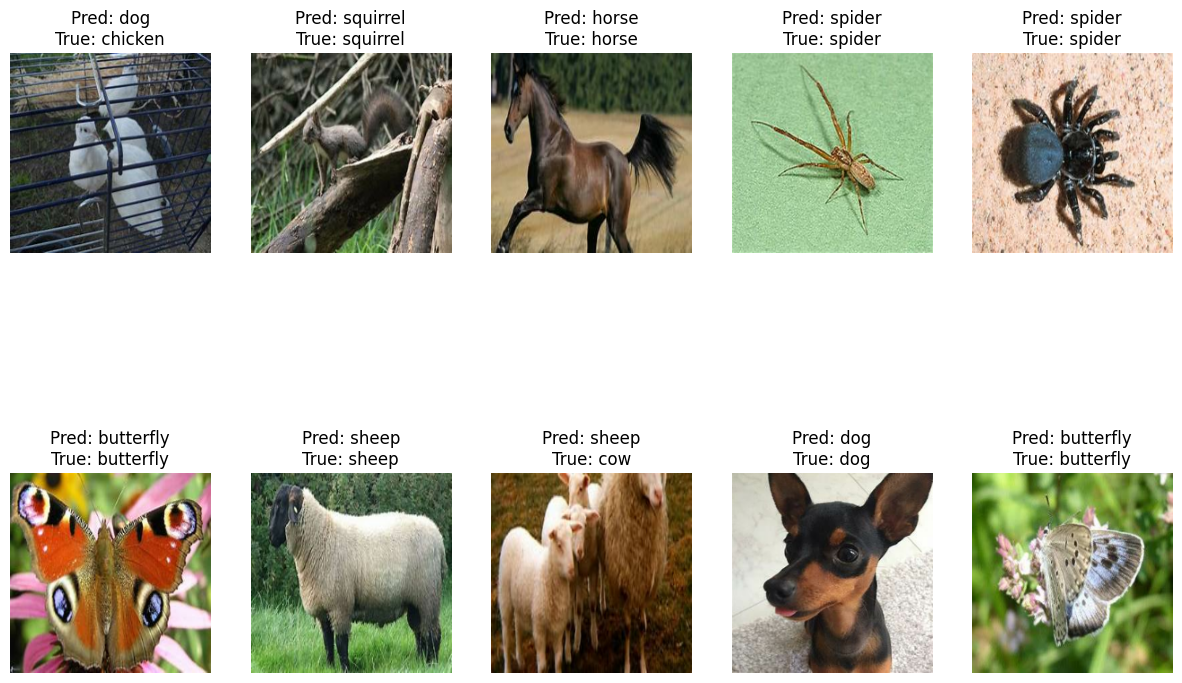

In [11]:
plt.figure(figsize=(15, 10)) 
for i in range(10):         
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"Pred: {classes[predicted_labels[i]]}\nTrue: {classes[labels.numpy()[i]]}")
    plt.axis("off")
plt.show()